# For two-dimensional flows in a vertical plane.  A stratified fluid, a hydrostatic pressure solver, and periodic boundary conditions

v3.62, 12 June 2018, by Brian Fiedler

$\newcommand{\V}[1]{\vec{\boldsymbol{#1}}}$
$\newcommand{\I}[1]{\widehat{\boldsymbol{\mathrm{#1}}}}$
$\newcommand{\B}[1]{\overline{#1}}$ 
$\newcommand{\pd}[2]{\frac{\partial#1}{\partial#2}}$
$\newcommand{\dd}[2]{\frac{\D#1}{\D#2}}$
$\newcommand{\pdt}[1]{\frac{\partial#1}{\partial t}}$
$\newcommand{\ddt}[1]{\frac{\D#1}{\D t}}$
$\newcommand{\D}{\mathrm{d}}$
$\newcommand{\Ii}{\I{\imath}}$
$\newcommand{\Ij}{\I{\jmath}}$
$\newcommand{\Ik}{\I{k}}$
$\newcommand{\VU}{\V{U}}$
$\newcommand{\del}{\boldsymbol{\nabla}}$
$\newcommand{\dt}{\cdot}$
$\newcommand{\x}{\times}$
$\newcommand{\dv}{\del\cdot}$
$\newcommand{\curl}{\del\times}$
$\newcommand{\lapl}{\nabla^2}$
$\newcommand{\VI}[1]{\left\langle#1\right\rangle}$
$\require{color}$

Introducing the hydrostatic approximation, with application to internal gravity waves.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display,clear_output
import time as Time
import math, os
import numpy as np
import scipy.fftpack
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
from IPython.core.display import HTML
import urllib.request

In [2]:
HTML(urllib.request.urlopen('http://metrprof.xyz/metr4323.css').read().decode())
#HTML( open('metr4323.css').read() ) #or use this, if you have downloaded metr4233.css to your computer

## The Boussinesq approximation

We consider these dimensional incompressible, inviscid equations:

$$
\rho\ddt{\VU} = -\del p +\rho f\VU \x \Ik + \rho\V{g}
$$
$$
\ddt{\rho} = 0
$$

A corollary of the above equation is:
$$
\del \dt \VU = 0
$$
The vertical component of the momentum equation is:
$$
\rho\ddt{w} = -\pd{p}{z} + \rho g
$$
For our convenience (plotting, understanding, etc.) we choose to construct the equations around the quantities 
associated with motion.  We write pressure as:
$$
p(x,y,z,t) = \B{p}(z) + p'(x,y,z,t)
$$
Likewise, we decompose density as:
$$
\rho(x,y,z,t) =  \B{\rho}(z) + \rho'(x,y,z,t)
$$
We require the overbar quantities by themselves to satisfy a steady, motionless, hydrostatic state:
$$
\pd{\overline{p}}{z} = -\B{\rho} g
$$
So in the momentum we see only the fluctuations $p'$ and $\rho'$ as causes of motion: 
$$
(\B{\rho}+\rho')\ddt{\V{U}} = -\del p' + (\B{\rho}+\rho') f\V{U}\x\I{k} + \rho'\V{g}
$$

We furthermore assume all density variations are slight, all within a few percent of constant value $\rho_0$.
So except, when taking derivatives of density, we replace $\rho+\rho'$ by $\rho_0$:

$$
\ddt{\V{U}} = -\frac{1}{\rho_0} \del p' + f\vec{U}\x\I{k} + \frac{\rho'}{\rho_0}\V{g}
$$

This is the [Boussinesq approximation]( http://tinyurl.com/BoussinesqApproximation ).
For notational convenience, we define a "pressure":
$$
P \equiv \frac{p'}{\rho_0} 
$$
and buoyancy
$$
b \equiv - g \frac{\rho'}{\rho_0}
$$
The momentum equation is now:
$$
\ddt{\V{U}} = - \del P + f\V{U}\x\I{k} + b \I{k}
$$

With $\rho_0$ defined as constant, $\ddt{\rho}=0$ is:

$$
\ddt{}\left( \overline{\rho} + \rho' \right)=0
$$

We can define a *total buoyancy*:
$$
B \equiv \B{B} + b
$$
with
$$
\B{B} \equiv  -\frac{g}{\rho_0} \B{\rho} \qquad  b \equiv  -\frac{g}{\rho_0} \rho'
$$
With $\B{B}$ only a function of $z$:
$$
\ddt{b} = - w \dd{\B{B}}{z}
$$
Very commonly we use [buoyancy frequency](http://en.wikipedia.org/wiki/Brunt%E2%80%93V%C3%A4is%C3%A4l%C3%A4_frequency) 
$$
N^2 \equiv \dd{\B{B}}{z}
$$
You can see the fundamental role $N^2$ in oscillations:
$$
\ddt{b} = - w N^2
$$
combined with an approximate form of the vertical momentum equation:
$$
\ddt{w} = b
$$
leads to simple harmonic oscillation with frequency $N$.

## Restrictions to the (x,z) plane

We model flows in the $(x,z)$ plane and assume no gradient in the $y$ direction, 
and thus no advection in the $y$ direction.


$$
\pdt{u} + u \pd{u}{x} + w \pd{w}{z} = - \pd{P}{x} + f v
$$

$$
\pdt{v} + u \pd{v}{x} + w\pd{v}{z}= - f u
$$


$$
\pdt{w} + u \pd{w}{x} + w \pd{w}{z} = -\pd{P}{z} +b 
$$

$$
\pd{u}{x} + \pd{w}{z}  = 0
$$

$$
\pd{b}{t} + u \pd{b}{x} + w \pd{b}{z} = - w N^2
$$



## Nondimensionalization
One further simplification: we assume $N^2$ is a *constant*. When positive, the layer is thus stably stratified.
When negative (which makes $N$ an imaginary number) the layer is unstable.
The layer has depth $H$.   We use the depth of the layer $H$ as the length scale, $1/|N|$ as the time scale, and $H|N|$ as the velocity scale.

We use a * to denote a dimensionless quantity.    Therefore:

$$
(x,z) = (x^*,z^*)H  \qquad
t = t^* \frac{1}{|N|} \qquad
(u,v,w) = (u^*,v^*,w^*) |N|H \qquad
P = P^* |N^2|H^2 \qquad
b = b^* H|N^2|
$$
Upon substitution, the dimensionless buoyancy equation is (notice the absence of $N^2$):
$$
\pdt{b^*} + u^* \pd{b^*}{x^*} 
+ w^* \pd{b^*}{z^*}= \pm w^* 
$$
The dimensionless vertical momentum equation looks the same as the dimensional equation, but it is sprinkled with $^*$ .
The two horizontal momentum equations are similar, but $f$ is replaced by $f/|N|$.

### Dropping the *

Dragging along the $^*$ notation would be cumbersome. So we drop the  $^*$, and the equations will be understood to be dimensionless, even though symbols appear to be same as in the dimensional counterparts.

$$
\pdt{u} + u \pd{u}{x} + w \pd{u}{z} = - \pd{P}{x} + \frac{f}{|N|} v
$$

$$
\pdt{v} + u \pd{v}{x} + w \pd{v}{z}= - \frac{f}{|N|} u
$$


$$
\pdt{w} + u \pd{w}{x} + w \pd{w}{z}= - \pd{P}{z} +b 
$$

$$
\pd{u}{x} + \pd{w}{z}  = 0
$$

$$
\pdt{b} + u \pd{b}{x} + w \pd{b}{z} = \pm w 
$$


The rigid boundaries at the top and bottom are at $z=0$ and $z=1$.
The dimensionless length of the domain could be denoted $L$. This number $L$ could also be called the aspect ratio of the domain.

## More about buoyancy 
The model conserves total buoyancy equation, without a source term:
$$
\ddt{B}=0
$$
The above is so simple, that it begs the question: *why work with $b$*?

In our *dimensionless model*, we have
$$
\ddt{b} = \pdt{b} + u \pd{b}{x} + w \pd{b}{z} = \pm w  = \pm \ddt{z}
$$
So our model equation, which has $b$ generated by $w$, is equivalent to
$$
\ddt{}\left(b \mp z\right)=0
$$
So the dimensionless total buoyancy of our model is just $B \equiv b\mp z$.
We will often plot and analyze $B$.  

But to answer the above question: 
* It is computational advantageous to work with the advection and generation of $b$:  it tends to be concentrated away from the boundaries where the model equations may not be ideally developed.
* Our model should make connections with linear theory, which requires a buoyancy variable that is associated only with motion, and that is zero in the steady state.
* Working with $b$ insures the $P$ that we solve for can cause motion, and is not merely holding fluid in place.

## The linear theory

This is not a course about pencil and paper dynamics, but some pencil and paper work
may be needed here to demonstrate under what circumstances the hydrostatic approximation
is justified. Let's examine an analytical solution for linear (meaning very small amplitude) waves.
For linear wave analysis we can work with the *dimensional* equations.  In our first exploration, we
take $f=0$:

$$
\pdt{u}  = - \pd{P}{x} 
$$

$$
\pdt{w} = - \pd{P}{z} +b 
$$

$$
\pd{u}{x} + \pd{w}{z}  = 0
$$

$$
\pdt{b} = - w N^2
$$

The above are 4 first order equations for 4 unknown fields: $u$, $v$, $P$ and $b$. 

$$
\pd{^2}{t^2} 
\left(
\pd{^2}{x^2} 
+
\pd{^2}{z^2} 
\right) w = - N^2\pd{^2}{x^2} w
$$
Let's guess one possible solution for $w(x,z,t)$ is
$$
w = A \cos(kx-\omega t) \sin(m z)
$$
Note $m=\pi/H$ allows for $w=0$ at $z=0$ and $z=H$.
We find our guess is correct only if
$$
\frac{\omega^2}{k^2} = N^2\frac{1}{k^2 +m^2}
$$

For small $k$, 
$$
\frac{\omega^2}{k^2} = N^2\frac{1}{m^2}
$$
and the waves have a phase speed $c\equiv \omega/k$ that is independent of $k$.

### Hydrostatic approximation

The "small $k$" result above is identical to the result beginning with the assumption that
$\frac{\partial w}{\partial t}$ is negligible in the vertical momentum equation:
$$
0 = - \frac{\partial P}{\partial z} +b  \qquad \leftarrow~ \mathrm{the~ hydrostatic~ approximation}
$$

STUDENTS: combine the remaining three equations with the above equation, to derive $\frac{\omega^2}{k^2}$ for hydrostatic waves.

We conclude that, at least for waves, a  hydrostatic approximation is valid for waves of long wavelength,
or equivalently small wavenumber: $|k| << |m|$.

It is important to understand that the hydrostatic approximation does NOT imply that $\frac{\partial w}{\partial t}=0$, or
$w=0$, it only means the vertical intertia does not have much impact on the dynamics.


## The hydrostatic pressure solver

Suppose the vertical acceleration is relatively small, meaning the two
terms on the right-hand-side nearly balance:
$$
\pdt{w} = - \pd{P}{z} +b 
$$
So that, to a good approximation the pressure fluctuation $P$ is also hydrostatic, just as the base state $\B{p}$ is:
$$
\pd{P}{z} = b 
$$
But we need to find $P(x,z,t)$ that not only is in hydrostatic balance with $b$, but also forces the solution to obey 
$$
\pd{u}{x} + \pd{w}{z}  = 0
$$
So we seek
$$
P(x,z,t) = P_h(x,z,t) + P_x(x,t)
$$
Where $P_h$ is *any* solution that satisfies $\pd{P_h}{z} = b$ and 
$P_x$ is the solution that we find for that enforces non-divergence.

When using the hydrostatic solver for pressure, the solution for $w$ is not forecasted 
but instead is diagnosed:
$$
w(x,z,t) = - \int_0^z \pd{u}{x}(x,z',t)  ~\D z'
$$
You might think non-divergence is thus easily  satisfied, but there is a catch.
At the top boundary ($z=H$ in the dimensional equations, or $z=1$ in the dimensionless equations), we must have
$w=0$.  So we seek $P_x$ that allows that to happen.  Another way to describe what we are doing is that we seek $P_x$ that keeps the net convergence into any column to be zero.

Let $\pd{U}{t}$ be all the accumulated accelerations, except for that from $P_x$:
$$
\pdt{u} = \pdt{U} - \pd{P_x}{x} 
$$
We need
$$
\int_0^1 \pdt{u} \D z = 0 
$$
So we must have:
$$
\pd{P_x}{x}  = \int_0^1 \pdt{U} \D z
$$

$P_x(x,t)$ is then easily found by "integrating" the above equation with $P_x=0$ arbitrarily at a point.


<hr/>
## Functions

### Some familiar functions

In [3]:
# Expands the margins of a matplotlib axis, 
# and so prevents arrows on boundaries from being clipped. 
def stop_clipping(ax,marg=.02): # default is 2% increase
    l,r,b,t = ax.axis()
    dx,dy = r-l, t-b
    ax.axis([l-marg*dx, r+marg*dx, b-marg*dy, t+marg*dy])

In [4]:
# dqdt requires a list of the time derivatives for q, stored 
# in order from present to the past
def ab_blend(dqdt,order):
    if order==1:
        return dqdt[0]
    elif order==2:
        return 1.5*dqdt[0]-.5*dqdt[1]
    elif order==3:
        return (23*dqdt[0]-16*dqdt[1]+5*dqdt[2])/12.
    else:
        print("order", order ," not supported ")    

In [5]:
def advect_box(q,u,v,dx,dy): 
# this function previously was call "advect"
# third-order upwind advection of q
# all fields are on the U-grid    
    dqdt = np.zeros(q.shape)
    
    dqmx = np.zeros(q.shape)
    dqpx = np.zeros(q.shape)
    dqmy = np.zeros(q.shape)
    dqpy = np.zeros(q.shape)
    
    dqmx[:,1]  = -q[:,0] + q[:,1] # 1st order, plus side at left wall
    dqmx[:,2:-1] = (q[:,:-3] - 6*q[:,1:-2] + 3*q[:,2:-1] + 2*q[:,3:])/6. # 3rd order, minus side
    dqpx[:,-2] = -q[:,-2] + q[:,-1] # 1st order, plus side at right wall
    dqpx[:,1:-2] = (-2*q[:,0:-3] - 3*q[:,1:-2] + 6*q[:,2:-1] -1*q[:,3:])/6. #3rd order, plus side

    dqmy[1,:]  = -q[0,:] + q[1,:] # 1st order, minus side at bottom wall
    dqmy[2:-1,:] =  (q[:-3,:] - 6*q[1:-2,:] + 3*q[2:-1,:] + 2*q[3:,:])/6. # 3rd order, minus side
    dqpy[-2,:] = -q[-2,:] + q[-1,:] # 1st order, plus side at top wall
    dqpy[1:-2,:] = ( - 2*q[0:-3,:]  - 3*q[1:-2,:] + 6*q[2:-1,:] - q[3:,:] )/6. # 3rd order, plus side


    dqdx = np.where(u>0.,dqmx,dqpx)/dx # upwind, emphasize side from where fluid is coming from
    dqdy = np.where(v>0.,dqmy,dqpy)/dy # ditto
    
    dqdt += -u*dqdx
    dqdt += -v*dqdy
    
    return dqdt

In [6]:
#############################################################
def divergence(u,v,dx,dy):
    ush = u.shape
    vsh = v.shape
    if ush == vsh: # must be B-grid
        div = .5*( u[:-1,1:] + u[1:,1:] - u[:-1,:-1] - u[1:,:-1])/dx + \
              .5*( v[1:,:-1] + v[1:,1:] - v[:-1,:-1] - v[:-1,1:])/dy
    elif ush[1]-vsh[1] == 1 and vsh[0]-ush[0] == 1: #must be C-grid
        div = (u[:,1:]-u[:,:-1])/dx + (v[1:,:]-v[:-1,:])/dy
    else:
        print("Fail divergence. Array shape implies neither B-grid or C-grid")
    return div
#############################################
def laplacian(p,dx,dy, il=None, ir=None, jb=None, jt=None):
# for diffusion terms
# p is not pressure here, but any gridded variable
# Returns Laplacian of p, d^2p/dx^2 + d^2p/dy^2 + d^2p/dz^2  .
# On the boundaries, specify how to grab a point the would otherwise be outside the domain.
# Periodic boundary conditions can thus be accommodated.
# If not specified, the terms in the boundary normal direction are ignored. 
    rdx2 = 1./(dx*dx)
    rdy2 = 1./(dy*dy)
    lapl = np.zeros(p.shape)
    lapl[:,1:-1]  =  rdx2*( p[:,:-2] -2*p[:,1:-1] + p[:,2:] )
    lapl[1:-1,:] +=  rdy2*( p[:-2,:] -2*p[1:-1,:] + p[2:,:] ) 
    if il in [-2,-1,0,1]:    
        lapl[:,0]  +=  rdx2*( p[:,il] -2*p[:,0] + p[:,1] ) 
    if ir in [-2,-1,0,1]:    
        lapl[:,-1] +=  rdx2*( p[:,-2] -2*p[:,-1] + p[:,ir] )
    if jb in [-2,-1,0,1]:
        lapl[0,:]  +=  rdy2*( p[jb,: ] -2*p[0,:] + p[1,:] ) 
    if jt in [-2,-1,0,1]:
        lapl[-1,:] +=  rdy2*( p[-2,: ] -2*p[-1,:] + p[jt,:] ) 
    return lapl
#############################################################
def vortU(u,v,dx,dy):
    # dv/dx - du/dy at U-grid
    ush = u.shape
    vsh = v.shape
    if ush == vsh: # must be B-grid
        vort = np.zeros(ush)
        vort[1:-1,1:-1] =  (v[1:-1,2:] - v[1:-1,:-2])/(2*dx) - (u[2:,1:-1] - u[:-2,1:-1])/(2*dy)
    elif ush[1]-vsh[1] == 1 and vsh[0]-ush[0] == 1: #must be C-grid
        vort = np.zeros( (vsh[0], ush[1]) ) # U-grid is largest
        vort[1:-1,1:-1] =  (v[1:-1,1:]-v[1:-1,:-1])/dx - (u[1:,1:-1]-u[:-1,1:-1])/dy
    else:
        print("Fail vortU. Array shape implies neither B-grid or C-grid")
    return vort

### some familiar functions,  with expanded capabilities for periodic BCs

In [7]:
#############################################################
# interpolates U-grid variable to the p-grid:
def U_to_p(U):
    return .25*( U[:-1,1:] + U[1:,1:] + U[:-1,:-1] + U[1:,:-1])
####
def w_to_u(w,bn='rigid'):
    iz,ix = w.shape
    atu=np.zeros((iz-1,ix+1))
    atu[:,1:-1] = .25*( w[:-1,:-1] + w[:-1,1:] + w[1:,:-1] + w[1:,1:] )
    if bn == 'rigid':
        atu[:,0]=atu[:,1]
        atu[:,-1]=atu[:,-2]
    elif bn == 'periodic':
        atu[:,0 ] = .25*( w[:-1,-1] + w[:-1,0] + w[1:,-1] + w[1:,0] )
        atu[:,-1] = atu[:,0]
    return atu
####
def u_to_w(u):
    iz,ix = u.shape
    atw=np.zeros((iz+1,ix-1))
    atw[1:-1,:] = .25*( u[:-1,:-1] + u[:-1,1:] + u[1:,:-1] + u[1:,1:] )
    atw[0,:]=atw[1,:]
    atw[-1,:]=atw[-2,:]
    return atw
###
def v_to_u(v,bn='rigid'):
    iz,ix = v.shape
    atu=np.zeros((iz,ix+1))
    atu[:,1:-1] = .5*( v[:,:-1] + v[:,1:] )
    if bn == 'rigid':
        atu[:,0] = atu[:,1]
        atu[:,-1] = atu[:,-2]
    elif bn == 'periodic':
        atu[:,0] = .5*( v[:,-1] + v[:,0]  )
        atu[:,-1] = atu[:,0]
    return atu

def u_to_p(u):
    return (u[:,:-1] + u[:,1:] )*.5
def w_to_p(w):
    return (w[:-1,:] + w[1:,:] )*.5

In [8]:
def Btotal(b,strat,zb):
    if strat==0:
        return b
    elif strat>0.:
        return b + strat*zb
    else:
        return b + strat*(zb-1)

In [9]:
def advect(q,u,w,dx,dz,periodic=False): 
# 3rd-order upwind advection
# q,u,v are co-located

    if not periodic: # not periodic, use standard advection with rigid boundaries:
        return advect_box(q,u,w,dx,dz) 
    
    sh = q.shape
    Q = np.zeros( (sh[0],sh[1]+4) )
    Q[:, 2:-2 ] = q

    if periodic=='U' or periodic=='u':        
        Q[ : , :2] = q[ : , -3:-1 ]
        Q[ : , -2:] = q[ :, 1:3 ]
    elif periodic=='v' or periodic=='w' or periodic=='b':
        Q[ : , :2 ]  = q[ : , -2: ]
        Q[ : , -2: ] = q[ : , :2 ] 
    
    dqdt=np.zeros(sh)
    dqmx=np.zeros(sh)
    dqpx=np.zeros(sh)
    dqmz=np.zeros(sh)
    dqpz=np.zeros(sh)

# "m" is difference biased to the minus side, "p" to the plus side
# must use first order "#1" if too close to wall
    
    dqmx[:,:] =  (2*Q[:,3:-1] + 3*Q[:,2:-2] - 6*Q[:,1:-3] + Q[:,:-4])/6. 
    dqpx[:,:] = -(2*Q[:,1:-3] + 3*Q[:,2:-2] - 6*Q[:,3:-1] + Q[:,4:] )/6.

    dqmz[1,:]  = q[1,:]-q[0,:]  #1
    dqmz[2:-1,:] = (2*q[3:,:]+3*q[2:-1,:]-6*q[1:-2,:]+q[:-3,:])/6. #3
    dqpz[-2,:] = q[-1,:]-q[-2,:] #1
    dqpz[1:-2,:] = -(2*q[0:-3,:]+3*q[1:-2,:]-6*q[2:-1,:]+q[3:,:])/6. #3

# use derivatives biased to the upwind side:
    dqdx=np.where(u>0.,dqmx,dqpx)/dx
    dqdz=np.where(w>0.,dqmz,dqpz)/dz

# advective terms:
    dqdt+=-u*dqdx
    dqdt+=-w*dqdz
    return dqdt

In [10]:
def poisson_p_fft_prep(Nxp,Nyp,dx,dy,lapl='discrete',periodic=False):
# returns the coefficients to multiply the vorticity Fourier amplitudes   
    L = dx*Nxp
    W = dy*Nyp
   
    Ka = np.arange(Nxp)  # the wavenumbers of the cos functions in the x-direction
    Ma = np.arange(Nyp)
        
    if periodic: Ka[1::2] += 1 # because both cos and sin
    
    ka = Ka*np.pi/L
    ma = Ma*np.pi/W

    lapl_op =np.zeros((Nyp,Nxp)) 
    if lapl == 'discrete':
        lapl_op[:] = (2*np.cos(ka*dx)-2)/dx**2
    else: # the calculus Laplacian
        lapl_op[:] += -ka**2
    lapl_opT=lapl_op.T # reverse columns and rows
    if lapl == 'discrete':
        lapl_opT[:] += (2*np.cos(ma*dy)-2)/dy**2 # add to every row
    else: # the calculus Laplacian
        lapl_opT[:] += -ma**2
    lapl_op=lapl_opT.T # reverse columns and rows
    lapl_op[0,0] = 1.
    invlapl = 1./lapl_op
    return invlapl

def poisson_p_fft(div,invlapl,periodic=False):
    sh = div.shape
    if periodic:
        divt = scipy.fftpack.rfft( div , axis=1) # discrete sin and cos transform of rows of div
    else:
        divt = scipy.fftpack.dct( div , axis=1, type=2) # discrete cos transform of rows of div
    
    divt = scipy.fftpack.dct( divt , axis=0, type=2) # discrete cos transform of rows of div
    
    pt = divt*invlapl
    
    pt = scipy.fftpack.idct(pt,axis=0,type=2) # inverse transform of pt to p
    if periodic:
        p = scipy.fftpack.irfft(pt,axis=1) # inverse transform of pt to p
        p = p/(2*sh[0]) #The need for this division is convention of fft
    else:
        p = scipy.fftpack.idct(pt,axis=1,type=2) # inverse transform of pt to p
        p = p/(4*sh[0]*sh[1]) #The need for division is convention of fft
    
    return p     

###  C-grid hydrostatic solver

In [11]:
def hydrostatic_pressure_solver(dudt,b,dx,dz,divha_target=None,periodic=False):
# for the C-grid
# dudt is horizontal acceleration, without PGF added yet
# b is buoyancy
    ph=np.zeros( (b.shape[0]-1, b.shape[1]) )
    for k in range(1,ph.shape[0]): # note ph[0]=0.
         ph[k] = ph[k-1] + dz*b[k]
    dudth = (ph[:,:-1] - ph[:,1:])/dx 
    dudt[:,1:-1] += dudth
    if periodic:
        dudt[:,0] += (ph[:,-1]-ph[:,0])/dx
        dudt[:,-1] = dudt[:,0] 
    dudtz = dudt[:].sum(0)/p.shape[0] #vertical integral of dudt
       
    dudtp = np.zeros(dudt.shape[1])
    px = np.zeros(p.shape[1])            
    if divha_target != None: dudtz[1:] += - dx*divha_target.cumsum()
    px[1:] = dx*dudtz[1:-1].cumsum()
   
            
    dudtp[1:-1] = (px[:-1] - px[1:])/dx
    if periodic:
        dudtp[0] += (px[-1]-px[0])/dx
        dudtp[-1] = dudtp[0] 

    dudtm = dudt + dudtp # total modified x acceleration, note clever Python adds dudtp to each level of dudt 
    pm = ph + px # total modified pressure, will be returned and used as p.
    pm = pm - pm.mean()
    return dudtm, pm # return dudt with the -dp/dx included, and the final modified pressure field

###############################################
def wfromu(u,dx,dz):
    iz,ix = u.shape
    w = np.zeros( (iz+1,ix-1) )
    dudx = (u[:,1:]-u[:,:-1])/dx 
    w[1:] = -dz*dudx.cumsum(0)
    return w

<hr/>
## Choose an experiment:

In [32]:
nexp = 21

if nexp==21: # the familiar rising blob
    xmax=1.
    zmax=1.
    Nx,Nz = 129,129
    strat = 0.
    centered = 1
    periodic= False
    plot_x_to_y = xmax/zmax

if nexp==22: # the familiar rising blob, off-centered init
    xmax=1.
    zmax=1.
    Nx,Nz = 129,129
    strat = 0.
    centered = .42
       
if nexp == 31: # convection
    strat = -1
    xmax,zmax = 2.828,1. 
    Nx,Nz = 65,33
    plot_x_to_y = xmax/zmax

In [33]:
# make the U-grid
dx = xmax/(Nx-1.) 
dz = zmax/(Nz-1.)
x1U = np.linspace(0,xmax,Nx)
z1U = np.linspace(0,zmax,Nz)
xU,zU = np.meshgrid(x1U,z1U)

In [34]:
#make the other grids
print("dx=",dx,"dz=",dz)
print("range=",xU.max(),zU.max())

xp = U_to_p(xU)
zp = U_to_p(zU)

xw = 0.5*( xU[:,:-1] + xU[:,1:] )
zw = 0.5*( zU[:,:-1] + zU[:,1:] )
xb = xw
zb = zw
xu = 0.5*( xU[:-1,:] + xU[1:,:] )
zu = 0.5*( zU[:-1,:] + zU[1:,:] )
xv = xp
zv = zp

dx= 0.0078125 dz= 0.0078125
range= 1.0 1.0


<hr/>
## Test the Poisson solver

In [35]:
invlapl = poisson_p_fft_prep(Nx-1,Nz-1,dx,dz,lapl='discrete',periodic=periodic) # lapl='calculus' or lapl='discrete'
np.random.seed(2) # define seed, so that random produces same values each time
p_test = np.random.random(xp.shape) # a random field of p, for testing
p_test -= p_test.mean()
if periodic:
    lapl_of_p = laplacian(p_test, dx, dz, il=-1,ir=0,jb=0,jt=-1)     
else:
    lapl_of_p = laplacian(p_test, dx, dz, il=0,ir=-1,jb=0,jt=-1)
print(p_test.shape)
print(lapl_of_p.shape)

(128, 128)
(128, 128)


In [36]:
#%%timeit
#p_solved= poisson_p_fft(lapl_of_p, invlapl) 

Results from the `%%timeit` study.

Here are the results of my *periodic* tests, so that you don't need to do it.

| Nx-1 &times; Nz-1 | ms per loop |
|---|---|---|
| 63 x 31 | .372 |
| 64 x 32 | .157 |
| 65 x 33 | .237 |
| 127 x 63 | 3.67 |
| 128 x 64 | .406 |
| 129 x 65 | 1.05 |



In [37]:
# Does the solution of the Poisson equation give us
# the pressure we started with?
p_solved = poisson_p_fft(lapl_of_p, invlapl,periodic=periodic) 
p_solved -= p_solved.mean()
diff = p_test - p_solved
diff2 = diff**2
print( "\nr.m.s. error should be very small:", diff2.mean() )


r.m.s. error should be very small: 1.1349813344253857e-29


<hr/>
## Initialize the fields:

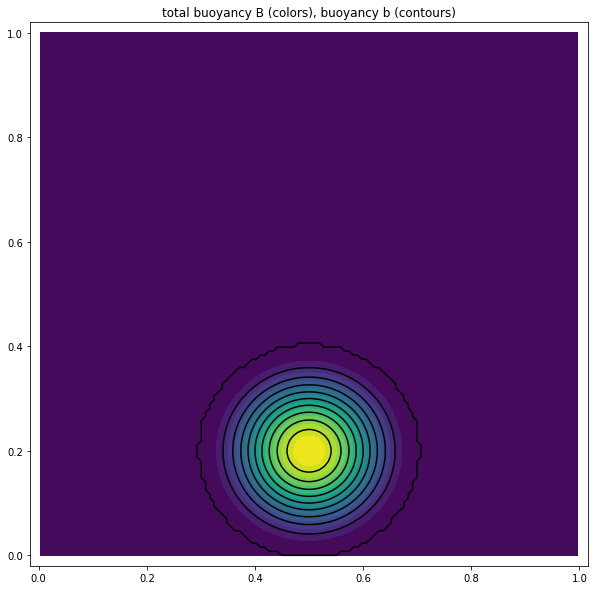

In [38]:
ui = np.zeros((Nz-1,Nx))
vi = np.zeros((Nz-1,Nx-1))
wi = np.zeros((Nz,Nx-1))
pi = np.zeros((Nz-1,Nx-1))

######
xc = xmax/2.
gwidth = .125*xmax

if nexp < 10: # wave
    bi = -0.2*np.sin(np.pi*zb)*np.exp(-((xb-centered*xc)/gwidth)**2)

elif 20<nexp<25:
    xcen = .5*centered
    zcen=.2
    r2 = (xb-xcen)**2 + (zb-zcen)**2 
    rbmax=.2
    rb = np.sqrt(r2)/rbmax
    bi = np.where(rb<1.,.5*(1.+np.cos(np.pi*rb)),0.)       
    
elif nexp == 31: # unstable convection
    bi = -0.2*np.sin(np.pi*zb)*(np.cos(2*np.pi*xb/xmax)+np.sin(2*np.pi*xb/xmax)) # periodic   
else:
    print(nexp," not valid")

quick,simple = plt.subplots(figsize=(10,10))
simple.contourf(xb,zb,Btotal(bi,strat,zb),20) # total buoyancy B 
simple.contour(xb,zb,bi,10,colors=['k',]) # buoyancy b
simple.set_title("total buoyancy B (colors), buoyancy b (contours)")
stop_clipping(simple)

<hr/>
## Set up the animation plot:

In [39]:
myfig = plt.figure(figsize=(10,10),facecolor='lightgrey')
ax2 = myfig.add_axes([0.1, 0.1, 0.8, .8], frameon=False) # contour axes
ax3 = myfig.add_axes([0.0, 0.1, 0.08, .8]) # for colorbar
ax3.axis('off')
ax2.axis('off')
plt.setp( ax2.get_xticklabels(), visible=False);
plt.close()
cbar_exists = False

In [40]:
def doplot():
    global cbar_exists

    ax2.clear()
    CF=ax2.contourf(xb, zb,Btotal(b,strat,zb), buoylevs, zorder=1)
    ax2.contour(xp, zp, p, preslevs, colors='white', zorder=2)
    ax2.contour(xp,zp,v,vlevs,colors='grey',zorder=3)
      
    u_at_p = (u[:,:-1]+u[:,1:])*.5
    w_at_p = (w[:-1,:]+w[1:,:])*.5
    stretch = zmax/xmax*plot_x_to_y # for making arrows aligned with streamlines
    Q = ax2.quiver(xp[::vd,::vd],zp[::vd,::vd],u_at_p[::vd,::vd]*stretch,w_at_p[::vd,::vd],
                    scale=anticipatedmaxw*Nz/vd, units='height', zorder=3)                                   
    ax2.axis('off')
    stop_clipping(ax2)

    if not cbar_exists: #bad things happen if cbar is called more than once 
        cbar_exists = True
        mycbar = myfig.colorbar(CF,ax=ax3,fraction=0.4)
        mycbar.ax.yaxis.set_ticks_position('left')
        sooner = mycbar.ax.yaxis.get_ticklabels()
        for boomer in sooner:
            boomer.set_fontsize(12)
            
    #annotations
    wmax=w.max()
    umax=u.max()
    ax2.text(-.1*xmax,1.01,
     't={0:5.3f}  xmax={1:4.0f}  umax={2:6.4f}  wmax={3:6.4f}'.format(t,xmax,umax,wmax),fontsize=16)
    if hydrostatic: 
        ax2.text(.99*xmax,1.01,'H',fontsize=16)
    if periodic: 
        ax2.text(.96*xmax,1.01,'P',fontsize=16)
    ax2.text(.5*xmax,-.05,expt,fontsize=12)
    ax2.text(0.*xmax,-.05,"f={0:5.2f}".format(fcoriolis),fontsize=16)
    
    clear_output(wait=True)
    display(myfig)   
          
    if outdir != None: 
        timestamp = 100*round(t,2)
        pngname = outdir+'/%06d.png' % round(timestamp) 
        myfig.savefig(pngname, dpi=72, facecolor='w', edgecolor='w', orientation='portrait')  


<hr/>
## Set parameters for the numerical solution:

In [41]:
hydrostatic = True
# periodic = True # normally set at top of notebook

invlapl = poisson_p_fft_prep(Nx-1,Nz-1, dx, dz, periodic=periodic) 

thermal_wind = False # with fcoriolis>0, initialize with thermal wind balance in waves
fcoriolis = 0.0 # 0,0.05,.1,.2  are interesting choices
cfl = 0.3 # what fraction of a grid space is a wave allowed to travel in one time unit?

speedmax = 1/3.1415 # estimated maximum wave speed, or fluid speed, that will occur
if 20<nexp<30: speedmax=1 

if hydrostatic:
    dt = cfl*dx/speedmax 
else:
    dt = cfl*min(dx,dz)/speedmax # this may be too restrictive
    
if nexp == 31: #convection
    diffusion_coef = epsicrit*.5
    dt = .05*dt # allow for diffusion limit
else:
    diffusion_coef = 0.

aborder = 3 # Adams-Bashforth order: 1, 2 or 3
expt = '%d,%d,%d,%5.1f,%3.2f,%5.4f,%9.4e' % (Nx,Nz, nexp, xmax,cfl,dt,diffusion_coef)
outdir = "wave" # set = to a directory name, if you want to save png, or None
if outdir != None and not os.path.exists(outdir): os.mkdir(outdir)
print(expt)


129,129,21,  1.0,0.30,0.0023,0.0000e+00


In [42]:
vd = 2 # arrow density (vd=1 plot all, vd=2 skip)
if Nz> 64: vd=4
buoylevs = np.linspace(-.05,1.05,12)
preslevs = np.linspace(-.5,.5,101)
vlevs = np.arange(-1.0125,1.0126,.025)
if nexp == 31:
    anticipatedmaxw = .5 # for quiver scaling of arrows
else:
    anticipatedmaxw = .7*zmax/xmax

<hr>
##  Start from t=0:

hydrostatic= True    periodic= False   thermal_wind= False


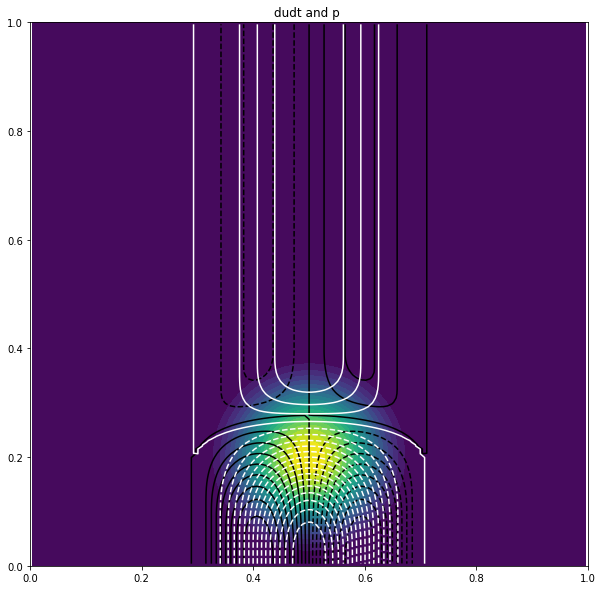

In [43]:
# copy initial fields, except pressure, to model:
u = ui.copy()
v = vi.copy()
w = wi.copy()
b = bi.copy()

p = 0.*xp

dwdt = 0.*w 
dudt = 0.*u
    
dwdt[1:-1] += b[1:-1]

# Now compute initial pressure
if hydrostatic:       
    dudt,p = hydrostatic_pressure_solver(dudt,b,dx,dz,divha_target=None,periodic=periodic)
else: 
    lapl_of_p = divergence(dudt,dwdt,dx,dz) # the needed lapl_of_p   
    p =  poisson_p_fft(lapl_of_p, invlapl, periodic=periodic)
    dudt[:,1:-1] += (p[:,:-1]-p[:,1:])/dx
    dwdt[1:-1,:] += (p[:-1,:]-p[1:,:])/dz
    if periodic:
        dudt[:,0] += (p[:,-1]-p[:,0])/dx
        dudt[:,-1] = dudt[:,0] 

####

dbdta = [None]*3
dudta = [None]*3
dvdta = [None]*3
dwdta = [None]*3

nstep = 0
monitor = []
monitor_title=''
times = []
kinEn = []
potEn = []
totEn = []
t=0. # initial value for t

quick,simple = plt.subplots(figsize=(10,10))
simple.contourf(xb,zb,Btotal(bi,strat,zb),20) # total buoyancy B 
if thermal_wind and fcoriolis>0.:
    v = u_to_p(-dudt/fcoriolis)
    simple.contour(xv,zv,v,20,colors="grey")
    simple.set_title("v and p, in thermal wind balance")
else:
    simple.contour(xu,zu,dudt,20,colors="black")
    simple.set_title("dudt and p ")
simple.contour(xp,zp,p,20,colors="white")
print("hydrostatic=",hydrostatic,"   periodic=",periodic, "  thermal_wind=",thermal_wind)

<hr/>
## Run the model:


In [44]:
print(expt)
print(fcoriolis)
print("t=",t)

129,129,21,  1.0,0.30,0.0023,0.0000e+00
0.0
t= 0.0


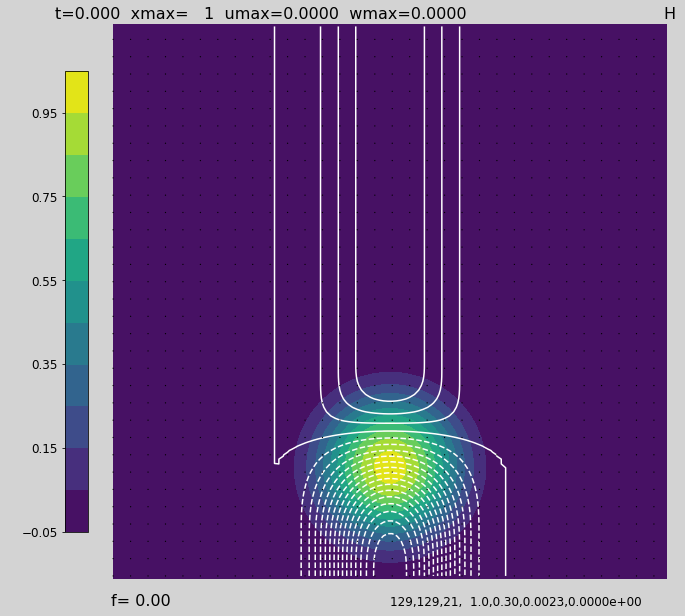

In [45]:
if nexp >= 30: # convection
    tstop = 15
    dplot = .5 # time between plots
elif nexp >=20:
    tstop = 4.
    dplot =.2
else: # wave
    tstop = xmax*3.1415
    dplot = tstop/20
    
tplot = t # time for next plot 
print(t,tstop)
if t==0: doplot()

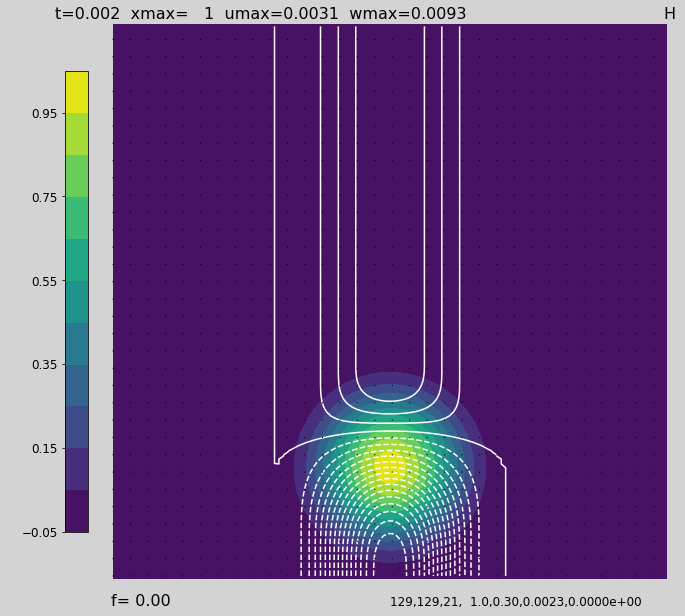

AssertionError: kaboom!

In [46]:
while t < tstop + dt/2.:
    nstep += 1
    abnow = min(nstep,aborder)      
    
    if periodic: 
        bnd="periodic"
    else:
        bnd="rigid"       
    uw = u_to_w(u)
    wu = w_to_u(w,bnd)
    wv = w_to_p(w)
    uv = u_to_p(u)
    vu = v_to_u(v,bnd)
    
    if periodic: # for now, diffusion is only implemented for periodic conditions
        dbdt = advect(b,uw,w,dx,dz,'b') - strat*w + diffusion_coef*laplacian(b,dx,dz,il=-1,ir=0)
        dudt = advect(u,u,wu,dx,dz,'u') + fcoriolis*vu + diffusion_coef*laplacian(u,dx,dz,il=-2,ir=1,jb=0,jt=-1)
        dvdt = advect(v,uv,wv,dx,dz,'v') - fcoriolis*uv + diffusion_coef*laplacian(v,dx,dz,il=-1,ir=0,jb=0,jt=-1)
    else:
        dbdt = advect(b,uw,w,dx,dz) - strat*w 
        dudt = advect(u,u,wu,dx,dz) + fcoriolis*vu
        dvdt = advect(v,uv,wv,dx,dz) - fcoriolis*uv

        
    if hydrostatic: 
        dudt,p = hydrostatic_pressure_solver(dudt,b,dx,dz,periodic=periodic)          
    else:
        dwdt = advect(w,uw,w,dx,dz,'w')     
        dwdt[1:-1] += b[1:-1] # is this really necessary to not include boundary points?
        if periodic: dwdt += diffusion_coef*laplacian(w,dx,dz,il=-1,ir=0)
        lapl_of_p = divergence(dudt,dwdt,dx,dz)        
        if periodic:
            p =  poisson_p_fft(lapl_of_p, invlapl, periodic=periodic)
        else:
            p = poisson_p_fft(lapl_of_p, invlapl)
        dudt[:,1:-1] += (p[:,:-1]-p[:,1:])/dx
        dwdt[1:-1,:] += (p[:-1,:]-p[1:,:])/dz
        if periodic:
            dudt[:,0] += (p[:,-1]-p[:,0])/dx
            dudt[:,-1] = dudt[:,0] 
        
    
    dbdta = [dbdt.copy()] + dbdta[:-1]
    dudta = [dudt.copy()] + dudta[:-1]
    dvdta = [dvdt.copy()] + dvdta[:-1]
   
    if not hydrostatic: 
        dwdta = [dwdt.copy()] + dwdta[:-1]
        
    b += dt*ab_blend(dbdta,abnow)
    u += dt*ab_blend(dudta,abnow)
    v += dt*ab_blend(dvdta,abnow)
    
    if not hydrostatic: 
        w += dt*ab_blend(dwdta,abnow)
    else:     
        w = wfromu(u,dx,dz)
        wtop = w[-1].copy() # should be very close to zero
    
    t = t + dt
    times.append(t)
    KE = .5*dx*dz * (u_to_p(u)**2  + w_to_p(w)**2 + v**2).sum()
    kinEn.append(KE)
#    potEn.append(PE)
#    totEn.append(PE+KE) 
   
    assert u.max()<2.e10, 'kaboom!'
    if t > tplot - dt/2. : 
        doplot()
        tplot = min(tstop,tplot + dplot)

plt.close() # prevents mysterious second plot from popping up

#### energy history:

In [ ]:
quick,simple = plt.subplots(figsize=(12,6))
simple.plot(times,kinEn,'b')
simple.set_title('total kinetic energy');

## Student tasks:

### 1. Internal waves with the hydrostatic approximation

See reference to "STUDENTS" in the section [Hydrostatic approximation](#Hydrostatic-approximation)

### 2. In which regime is the hydrostatic approximation valid?

Run the centered wave with four different sets of parameters:

| `xmax` | `hydrostatic`|
|----|----|
|4 | False|
|4 | True |
|40 | False |
|40 | True |

Note that `hydrostatic=True`  uses the hydrostatic *approximation* to increase the computational speed of the model, but the equations have approximate physics.  Is the hydrostatic approximation accurate in the long-wavelength regime, or short-wavelength regime?

### 3. Forecast for Mars and Earth

A Martian colony of dolphins lives in a long trough of saline water, with the density increasing linearly  by 1% from top to bottom.  The trough is 4 km wide and 0.1 km deep. Lo and behold, on one fine day the initial deflection of the isopycnal surfaces looks exactly like `nexp=2`.  The dolphin colony wants to know how minutes elapse before the crests of the waves impact the end boundaries. What is your forecast? Assume the trough is on the equator.

By strange coincidence, the following day an Earth colony of dolphins asks for a forecast.  The dolphins live in a long trough of saline water, with the density increasing linearly  by 1% from top to bottom.  The trough is 40 km wide and 1.0 km deep.  Coincidentally, the initial deflection of the isopycnal surfaces looks exactly like `nexp=2`.  The dolphin colony wants to know how minutes elapse before the crests of the waves impact the end boundaries. What is your forecast? Assume the trough is on the equator.

### 4. Potential energy in a stratified fluid



In a previous notebook we derived the energy equations for $\ddt{b}=0$. Here we derive the energy equation
for
$$
\ddt{b} = -N^2 w
$$
So the production of KE is:
$$
\VI{wb} = \VI{\frac{-1}{N^2} \ddt{b} b}
= \frac{-1}{N^2} \VI{ \ddt{}\frac{b^2}{2} } = \frac{-1}{N^2} \pdt{}\VI{ \frac{b^2}{2} }
$$
where we have used our theorem that for incompressible flow with impenetrable boundaries:
$$
\VI{\ddt{q}} = \pdt{}\VI{q} 
$$

Thus
$$
\pdt{}\VI{\frac{u^2+w^2}{2} + \frac{1}{N^2}\frac{b^2}{2} } = 0
$$
The integral is total energy `E` in the model. The integral of  first term is kinetic energy `KE` and of the second term is potential energy `PE`.
In our Python model, it would be best to interpolate $u$ and $v$ to the p-grid to evaluate these integrals. The volume integral of an array `q` in the p-grid would be simply `q.sum()*dx*dz`. Show, with a plot, that in the model,
though `KE` and`PE` vary with time, the sum `E` is nearly invariant with time.

**Note: In our dimenionsionless model $N^2=1$.**
#### finish the plot
Now finish the monitoring of `potEn` and `totEn`.  In `nexp==2`, study the simulations with `fcoriolis` set to `0`,`0.05`,`0.1`,`0.2`.  Based on the appearance of the contour plots, and your revised "energy history" plot, what do you conclude about the effect of `fcoriolis` on the behavior of the wave?




# Appendix

<hr>
## unstable convection 

This will be explained later.

In [ ]:
# from my pencil and paper analysis:
pi = math.pi
epsicrit2 = 4/(3**3*pi**4)
print(math.sqrt(epsicrit2))
rayc = 27/4 * pi**4
print(rayc)
kcrit = pi/math.sqrt(2)
print(kcrit)
lambdacrit = 2*pi/kcrit
print(lambdacrit)
epsicrit = 1/math.sqrt(rayc)
print(epsicrit)